In [3]:
from sklearn.model_selection import GroupKFold, cross_val_score, KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import os, glob, re, json
from os.path import join
import numpy as np
import pandas as pd
from nilearn import image, masking, maskers, plotting, datasets

from nilearn.image import resample_to_img, math_img, new_img_like
from datetime import datetime
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import h5py
from nilearn.input_data import NiftiLabelsMasker, NiftiMapsMasker


# Multiclass clssification using sklearn
1. Classify pain, vicarious, cognitive maps based on single trials 
2. Classify pain, vicarious, cogntiive maps based on contrast maps

In [2]:
import gc
gc.collect()
# del braindf

0

In [ ]:
# 1. apply 

# 1. apply prob atlas to single trial

In [30]:
atlas_filename = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin2009cAsym_scaffold.nii.gz'
atlas_img = image.load_img(atlas_filename)
# Load the standard MNI template at 2mm resolution provided by nilearn
target_img = datasets.load_mni152_template(resolution=2)

# Load the CSV file containing labels
labels_csv = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin2009cAsym_labels.csv'
labels_df = pd.read_csv(labels_csv)

In [7]:
atlas_img.get_fdata().shape

(193, 229, 193, 542)

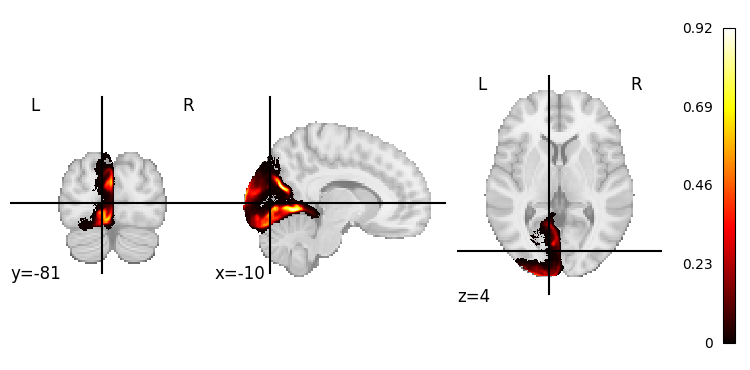

In [10]:
atlas3 = image.index_img(atlas_img, 3)
plotting.plot_stat_map(atlas3)

In [31]:
mpm_data = np.zeros(atlas_img.shape[:3], dtype=int)  # or dtype=np.int64 if you prefer

# Define the threshold
threshold = 0.2

# Iterate through each voxel and assign it to the parcel with the highest probability above the threshold
for i in range(atlas_img.shape[0]):
    for j in range(atlas_img.shape[1]):
        for k in range(atlas_img.shape[2]):
            probabilities = atlas_img.dataobj[i, j, k, :]
            max_prob = np.max(probabilities)
            if max_prob > threshold:
                mpm_data[i, j, k] = np.argmax(probabilities) + 1  # Ensure parcel indices start from 1

# Create a new NIfTI image for the MPM using the correct affine
mpm_img = nib.Nifti1Image(mpm_data, affine=atlas_img.affine)


# Juelich atlas

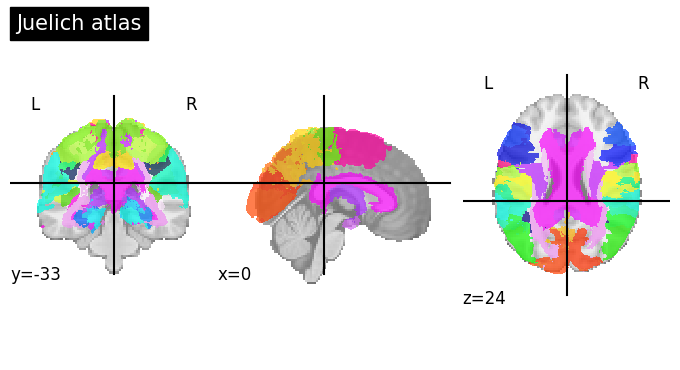

In [11]:
from nilearn import datasets
dataset_ju = datasets.fetch_atlas_juelich("maxprob-thr0-1mm")
atlas_ju_filename = dataset_ju.filename
plotting.plot_roi(atlas_ju_filename, title="Juelich atlas")

masker = NiftiLabelsMasker(labels_img=atlas_ju_filename, standardize=True)



In [25]:
image.load_img(atlas_ju_filename).get_data().unique()

ExpiredDeprecationError: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Raises <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0

In [12]:
singletrial_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupdown/'
sub = "sub-0101"

flist = glob.glob(join(singletrial_dir, sub, f"{sub}_ses-*_run-*_runtype-pain_event-stimulus_trial-*_cuetype-*_stimintensity-*.nii.gz"))


In [13]:
sub_parcel = []
for fname in flist:
    region_values = masker.fit_transform(fname)
    sub_parcel.append(region_values)


#     # Extract parcel-wise signals from each stat map
# parcelwise_values = []
# for stat_map in stat_maps:
#     # Extract signals
#     values = masker.fit_transform(stat_map)
#     parcelwise_values.append(values)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(


In [26]:
sub_parcel[0]

array([[-0.0449322 ,  0.01619408,  0.01706178, -0.08124131, -0.17087413,
         0.09351631, -0.41540135,  0.24557609, -0.06981375, -0.05215667,
         0.09541682, -0.5022823 , -0.09397911,  0.00463275, -0.14357223,
         0.03825917, -0.25768937, -0.16759914, -0.12264069,  0.00687929,
        -0.0324706 ,  0.02303364,  2.38508388,  0.68860101, -0.7411441 ,
        -0.26209834, -0.25927249, -0.2416294 , -0.04394463, -0.14384026,
        -0.1912987 , -0.07100296,  0.02330759, -0.0633051 ,  0.02706443,
        -0.12306058, -0.30895295, -0.1940383 , -0.29306175, -0.21294   ,
        -0.21036219, -0.29880419, -0.13170014,  0.00332975, -0.28957965,
        -0.3422706 , -0.14531495, -0.09409653, -0.09119745,  0.18226541,
        -0.10262111, -0.03241048, -0.0478748 , -0.04070856, -0.05968662,
        -0.17092695, -0.12456572, -0.11486416, -0.27268394,  0.07747123,
        -0.17987343,  0.2503395 , -0.14340309, -0.04584188, -0.09939877,
        -0.22441516, -0.27441216, -0.02630722, -0.0

In [27]:
region_values = masker.inverse_transform(sub_parcel[0])

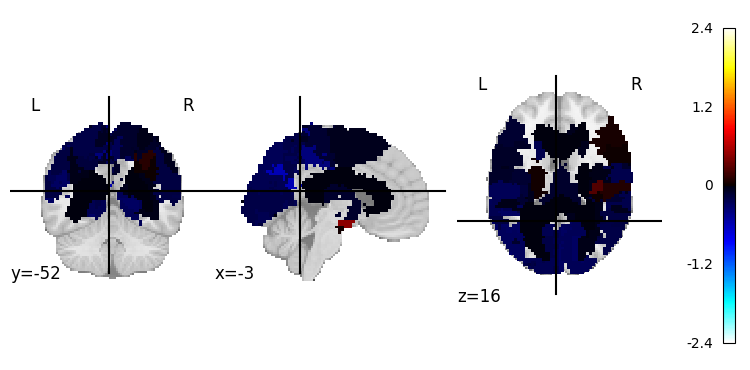

In [28]:

plotting.plot_stat_map(region_values)